# LAB 2: Write a program to count word frequency and to remove stop word
## Name: Janojit Chakraborty
## Registration Number: 21112011

Name: **Janojit Chakraborty** <br>
Reg No: **21112011** <br>
Class: **5 BSC DS** <br>

---------------



### Reading A pdf File

In [1]:
import PyPDF2

pdfFileObj = open("6786854.pdf", 'rb')

pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

print(f"Number of Pages: {pdfReader.numPages}")

content = ""

fr = int(input("From which page: "))
to = int(input("To which page: "))
for i in range(fr,to):
    page = pdfReader.pages[i]
    pageObj = page.extractText()
    content += pageObj

pdfFileObj.close()

Number of Pages: 3
From which page: 1
To which page: 3


In [2]:
print(content)

Usain Bolt's 100m world record time of 9.58 seconds at the 2009 World Championships is more than 
just a number; it's a symbol of human speed and athleticism. Bolt's lightning -fast sprint has 
captivated sports fans worldwide, making "9.58" a benchmark in sp rinting.  
Stopwords in Sports  
1. The Power of "The"     
In American football, "The Super Bowl" isn't just a game; it's an event that captivates the nation. 
"The" adds a sense of grandeur and importance, turning a simple football game into an iconic 
sporting spectacle.  
2. "And" in the 4x100m Relay                   
In track and field, the 4x100m relay is a thrilling event. The use of "and" between the numbers 
signifies teamwork, as athletes pass the baton to their teammates in a coordinated effort to achieve 
victory.  
3. "In" the World Series       
The World Series in baseball is a culmination of the season's efforts. The simple preposition "in" 
highlights that this event is not just about one game but the entire worl

### Separating the tokens and remove the symbols, numbers and stop words

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def preprocess_text(text):
    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token.isalpha()]

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    return tokens

processed_tokens = preprocess_text(content)
print(processed_tokens)

['usain', 'bolt', 'world', 'record', 'time', 'seconds', 'world', 'championships', 'number', 'symbol', 'human', 'speed', 'athleticism', 'bolt', 'lightning', 'sprint', 'captivated', 'sports', 'fans', 'worldwide', 'making', 'benchmark', 'sp', 'rinting', 'stopwords', 'sports', 'power', 'american', 'football', 'super', 'bowl', 'game', 'event', 'captivates', 'nation', 'adds', 'sense', 'grandeur', 'importance', 'turning', 'simple', 'football', 'game', 'iconic', 'sporting', 'spectacle', 'relay', 'track', 'field', 'relay', 'thrilling', 'event', 'use', 'numbers', 'signifies', 'teamwork', 'athletes', 'pass', 'baton', 'teammates', 'coordinated', 'effort', 'achieve', 'victory', 'world', 'series', 'world', 'series', 'baseball', 'culmination', 'season', 'efforts', 'simple', 'preposition', 'highlights', 'event', 'one', 'game', 'entire', 'world', 'baseball', 'uniting', 'fans', 'across', 'globe', 'evolution', 'sports', 'sports', 'come', 'long', 'way', 'since', 'inception', 'symbols', 'numbers', 'stopwor

### Calculating the Word Count 

In [4]:
from nltk.probability import FreqDist

def calculate_word_frequency(tokens):
    freq_dist = FreqDist(tokens)
    return freq_dist

In [5]:
word_freq_dist = calculate_word_frequency(processed_tokens)
print(word_freq_dist)

<FreqDist with 171 samples and 226 outcomes>


### Graphical Representation of Word Count

In [6]:
import matplotlib.pyplot as plt

def plot_word_frequency(freq_dist, num_words):
    freq_dist.plot(num_words, cumulative=False)
    plt.show()

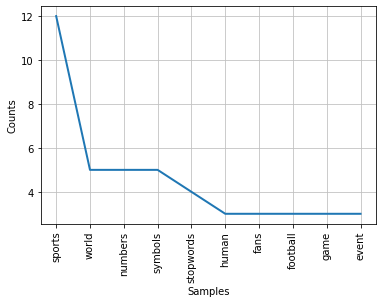

In [7]:
plot_word_frequency(word_freq_dist, 10)

In [8]:
def plot_word_frequency_pie_chart(freq_dist, num_words):
    # Get the most common words and frequencies
    common_words = freq_dist.most_common(num_words)
    labels = [word for word, _ in common_words]
    frequencies = [freq for _, freq in common_words]

    # Plot the frequency distribution as a pie chart
    plt.pie(frequencies, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

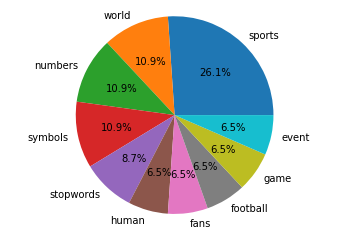

In [9]:
plot_word_frequency_pie_chart(word_freq_dist,10)

In [10]:
from wordcloud import WordCloud

def plot_word_frequency_wordcloud(freq_dist):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

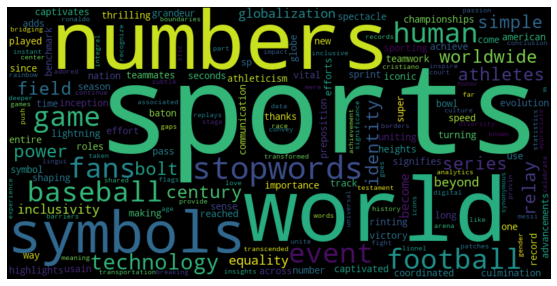

In [11]:
plot_word_frequency_wordcloud(word_freq_dist)